<a href="https://colab.research.google.com/github/FaizanAshrafBSE173070/hertsfypproject/blob/main/Codefyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


# Path to your uploaded zip
zip_path = 'UCI_HAR_Dataset.zip'

def load_har_data(zip_path, dataset_type='train'):
    # Define a temporary directory for extraction of the inner zip
    temp_dir = 'temp_har_data'
    os.makedirs(temp_dir, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as z_outer:
        # The inner zip file is named 'UCI HAR Dataset.zip' (note the spaces)
        inner_zip_name = 'UCI HAR Dataset.zip'

        if inner_zip_name not in z_outer.namelist():
            raise KeyError(f"Inner zip file '{inner_zip_name}' not found in the main archive. Outer zip contents: {z_outer.namelist()}")

        # Extract the inner zip file to the temporary directory
        z_outer.extract(inner_zip_name, path=temp_dir)
        extracted_inner_zip_path = os.path.join(temp_dir, inner_zip_name)

    # Now, open the extracted inner zip file
    with zipfile.ZipFile(extracted_inner_zip_path, 'r') as z_inner:
        # The actual data is inside 'UCI HAR Dataset/' directory within this inner zip
        base_folder_in_inner_zip = 'UCI HAR Dataset/'

        # Load feature names and activity labels [cite: 15, 16]
        features = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'features.txt'), sep='\s+', header=None)[1]
        activities = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'activity_labels.txt'), sep='\s+', header=None, names=['id', 'name'])

        # Load X, y, and subject files [cite: 16, 17, 19]
        X = pd.read_csv(z_inner.open(f'{base_folder_in_inner_zip}{dataset_type}/X_{dataset_type}.txt'), sep='\s+', header=None)
        y = pd.read_csv(z_inner.open(f'{base_folder_in_inner_zip}{dataset_type}/y_{dataset_type}.txt'), sep='\s+', header=None, names=['Activity_ID'])
        sub = pd.read_csv(z_inner.open(f'{base_folder_in_inner_zip}{dataset_type}/subject_{dataset_type}.txt'), sep='\s+', header=None, names=['Subject'])

        X.columns = features
        X['Activity'] = y['Activity_ID'].map(activities.set_index('id')['name'])
        X['Subject'] = sub['Subject']

    # Optional: Clean up the temporary directory and extracted zip file
    # import shutil
    # shutil.rmtree(temp_dir)

    return X

# Loading the training data (70% of volunteers) [cite: 7]
df = load_har_data(zip_path, 'train')
print(f"Loaded {df.shape[0]} samples with {df.shape[1]} features.")

<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2749842170.py:34: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'features.txt'), sep='\s+', header=None)[1]
/tmp/ipython-input-2749842170.py:35: SyntaxWarning: invalid escape sequence '\s'
  activities = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'activity_labels.txt'), sep='\s+', header=None, names=['id', 'name'])
/tmp/ipython-input-2749842170.py:38: SyntaxWarning: invalid escape sequence '\s'
 

Loaded 7352 samples with 563 features.


# **Human Activity Recognition: Classifying Physical Actions Using Smartphone Inertial Sensors**

# **Loading Dataset and File**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

!wget https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip -O UCI_HAR_Dataset.zip


# Path to your uploaded zip (the outer zip file)
zip_path = 'UCI_HAR_Dataset.zip'

def load_har_data(zip_path, dataset_type='train'):
    # Define a temporary directory for extraction of the inner zip
    temp_dir = 'temp_har_data'
    os.makedirs(temp_dir, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as z_outer:
        # The inner zip file is named 'UCI HAR Dataset.zip' (note the spaces)
        inner_zip_name = 'UCI HAR Dataset.zip'

        if inner_zip_name not in z_outer.namelist():
            raise KeyError(f"Inner zip file '{inner_zip_name}' not found in the main archive. Outer zip contents: {z_outer.namelist()}")

        # Extract the inner zip file to the temporary directory
        z_outer.extract(inner_zip_name, path=temp_dir)
        extracted_inner_zip_path = os.path.join(temp_dir, inner_zip_name)

    # Now, open the extracted inner zip file
    with zipfile.ZipFile(extracted_inner_zip_path, 'r') as z_inner:
        # The actual data is inside 'UCI HAR Dataset/' directory within this inner zip
        base_folder_in_inner_zip = 'UCI HAR Dataset/'

        # Load feature names and activity labels [cite: 15, 16]
        features = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'features.txt'), sep='\s+', header=None)[1]
        activities = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'activity_labels.txt'), sep='\s+', header=None, names=['id', 'name'])

        # Load X, y, and subject files [cite: 16, 17, 19]
        X = pd.read_csv(z_inner.open(f'{base_folder_in_inner_zip}{dataset_type}/X_{dataset_type}.txt'), sep='\s+', header=None)
        y = pd.read_csv(z_inner.open(f'{base_folder_in_inner_zip}{dataset_type}/y_{dataset_type}.txt'), sep='\s+', header=None, names=['Activity_ID'])
        sub = pd.read_csv(z_inner.open(f'{base_folder_in_inner_zip}{dataset_type}/subject_{dataset_type}.txt'), sep='\s+', header=None, names=['Subject'])

        X.columns = features
        X['Activity'] = y['Activity_ID'].map(activities.set_index('id')['name'])
        X['Subject'] = sub['Subject']

    # Optional: Clean up the temporary directory and extracted zip file
    # import shutil
    # shutil.rmtree(temp_dir)

    return X

# Loading the training data (70% of volunteers) [cite: 7]
df = load_har_data(zip_path, 'train')
print(f"Loaded {df.shape[0]} samples with {df.shape[1]} features.")

<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:40: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1406678583.py:36: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'features.txt'), sep='\s+', header=None)[1]
/tmp/ipython-input-1406678583.py:37: SyntaxWarning: invalid escape sequence '\s'
  activities = pd.read_csv(z_inner.open(base_folder_in_inner_zip + 'activity_labels.txt'), sep='\s+', header=None, names=['id', 'name'])
/tmp/ipython-input-1406678583.py:40: SyntaxWarning: invalid escape sequence '\s'
 

--2026-02-10 10:12:14--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘UCI_HAR_Dataset.zip’

UCI_HAR_Dataset.zip     [   <=>              ]  58.18M  98.2MB/s    in 0.6s    

2026-02-10 10:12:14 (98.2 MB/s) - ‘UCI_HAR_Dataset.zip’ saved [61005872]

Loaded 7352 samples with 563 features.


# **Exploratory Data Analysis**

## **Dataset Description**

In [21]:
df.head()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING,1


## **Descriptive statistical Analysis**

In [12]:
df.describe()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## **Visualizing Activity Distributions**

/tmp/ipython-input-1585241447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Activity', data=df, order=df['Activity'].value_counts().index, palette='viridis')


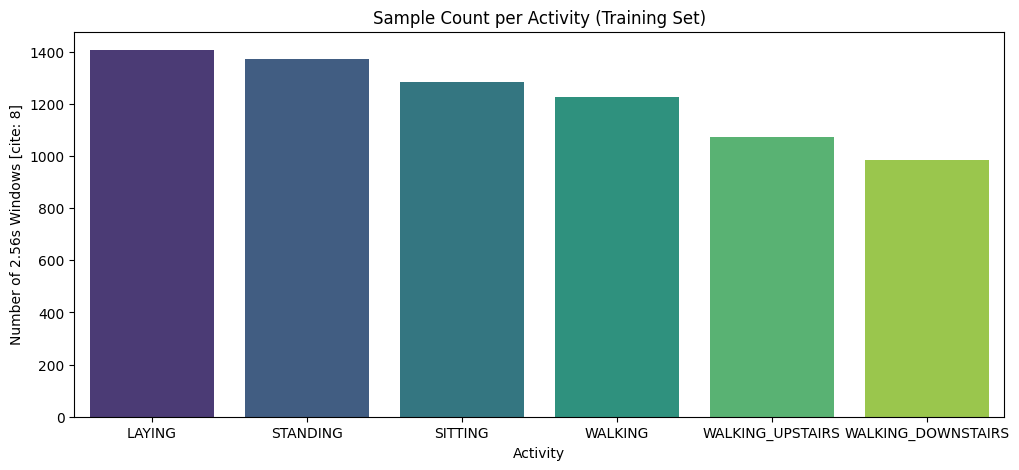

In [13]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Activity', data=df, order=df['Activity'].value_counts().index, palette='viridis')
plt.title('Sample Count per Activity (Training Set)')
plt.ylabel('Number of 2.56s Windows [cite: 8]')
plt.show()

## **Body Acceleration vs. Gravity**

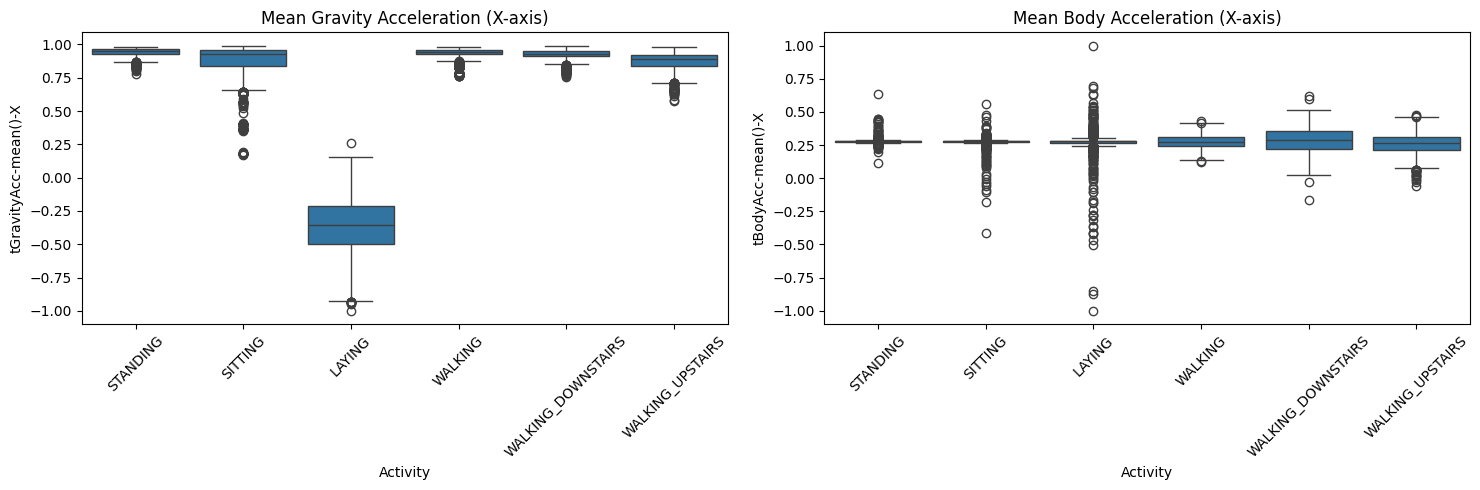

In [14]:
# Comparing Gravity vs Body Acceleration on the X-axis
# Units are 'g's [cite: 25]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='Activity', y='tGravityAcc-mean()-X', data=df, ax=axes[0])
axes[0].set_title('Mean Gravity Acceleration (X-axis)')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Activity', y='tBodyAcc-mean()-X', data=df, ax=axes[1])
axes[1].set_title('Mean Body Acceleration (X-axis)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Frequency Domain Analysis**

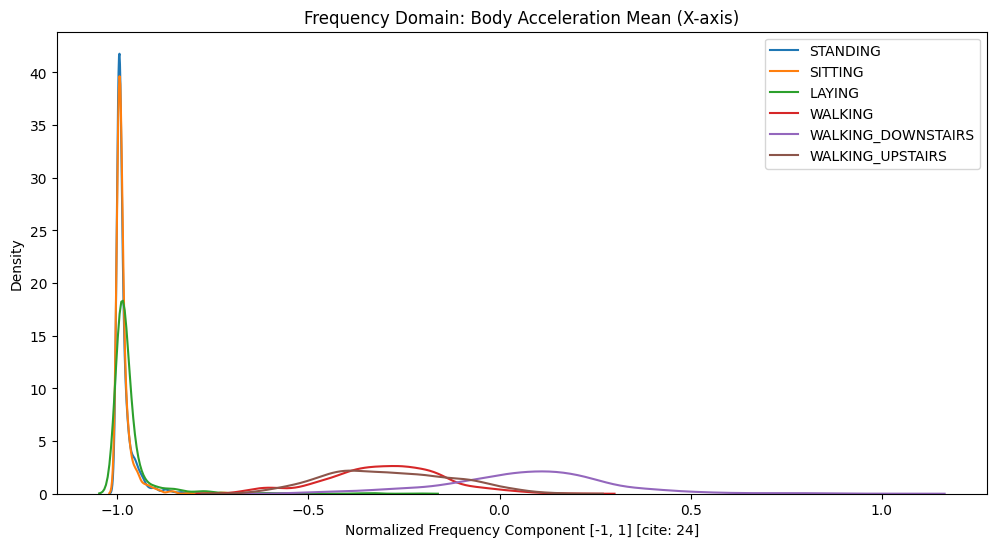

In [15]:
# 'f' prefix denotes frequency domain features [cite: 15]
freq_cols = [col for col in df.columns if col.startswith('fBodyAcc-mean()-X')]

plt.figure(figsize=(12, 6))
for activity in df['Activity'].unique():
    sns.kdeplot(df[df['Activity'] == activity]['fBodyAcc-mean()-X'], label=activity)

plt.title('Frequency Domain: Body Acceleration Mean (X-axis)')
plt.xlabel('Normalized Frequency Component [-1, 1] [cite: 24]')
plt.legend()
plt.show()

## **Subject Variance**

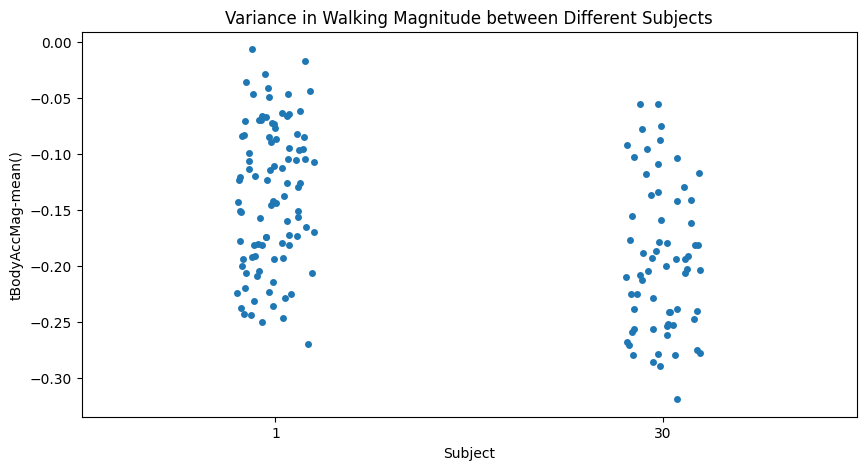

In [16]:
# Visualizing Subject 1 vs Subject 30 for the 'WALKING' activity
walking_df = df[df['Activity'] == 'WALKING']
subjects_to_compare = [walking_df['Subject'].min(), walking_df['Subject'].max()]

plt.figure(figsize=(10, 5))
sns.stripplot(x='Subject', y='tBodyAccMag-mean()', data=walking_df[walking_df['Subject'].isin(subjects_to_compare)])
plt.title('Variance in Walking Magnitude between Different Subjects')
plt.show()